Going to model the data here.

 final_simplex: (array([[  649955.29168109, 36185376.92408168],
       [  649955.29168083, 36185376.92411871],
       [  649955.29168065, 36185376.92414477]]), array([4.44608052e-11, 4.44608054e-11, 4.44608054e-11]))
           fun: 4.446080519204347e-11
       message: 'Optimization terminated successfully.'
          nfev: 310
           nit: 145
        status: 0
       success: True
             x: array([  649955.29168109, 36185376.92408168])


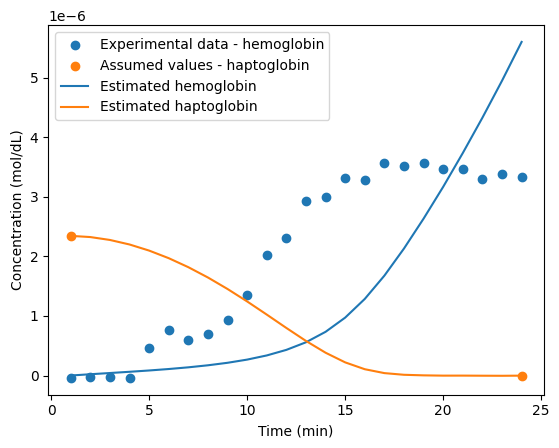

In [131]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.optimize import Bounds
from plotdf import plotdf

data = pd.read_excel('data.xlsx')

hpx = [1, 24]
hpy = [(2.344E-6), 0]
ic = (0, (2.344E-6))
ac = (1E2, 1000)

def func(x, GB, kr, V=3.4):
    dB = GB/V - kr * x[0] * x[1]
    dP = - kr * x[0] * x[1]
    return(dB, dP)

def err(params):
    GB, kr = params
    ODEoutputB = odeint(func, ic, data["time"], args = (GB, kr))
    ODEoutputP = odeint(func, ic, hpx, args = (GB, kr))
    errB = (ODEoutputB[:,0] - data["mol/dL"])**2
    errP = (ODEoutputP[:,1] - hpy)**2
    return (np.sum(errB) + np.sum(errP))

sol = minimize(err, x0 = ac, method='Nelder-Mead')
print(sol)

fitdata = odeint(func, ic, data["time"], args=(sol.x[0], sol.x[1]))
plt.scatter(data["time"], data['mol/dL'], label = "Experimental data - hemoglobin")
plt.scatter(hpx, hpy, label = "Assumed values - haptoglobin")
plt.plot(data["time"], fitdata[:,0], label = "Estimated hemoglobin")
plt.plot(data["time"], fitdata[:,1], label = "Estimated haptoglobin")
plt.xlabel("Time (min)")
plt.ylabel("Concentration (mol/dL)")
plt.legend()

In [132]:
# plotdf(func, # Function giving the rhs of the diff. eq. system
#      np.array([0,200]), # [xmin,xmax]
#      np.array([0,200]),# [ymin,ymax]
#      [(0,150)], # list of initial values for trajectories (optional)
#      # Additional parameters for `f` (optional)
#      parameters={"GB":50,"kr":0.3,"GP":0.01},
#      gridsteps=20,
#      nsteps = 10000,
#      tmax=20)

# plt.xlabel("B, concentration of hemoglobin (g/dL)")
# plt.ylabel("P, concentration of haptoglobin (g/dL)")